In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi.ipynb")

# Task 3: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/kpaya/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County.

Data Retrieved: Oct. 22, 2024

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



(array([17167., 17257., 17348., 17440., 17532., 17622., 17713., 17805.,
        17897.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

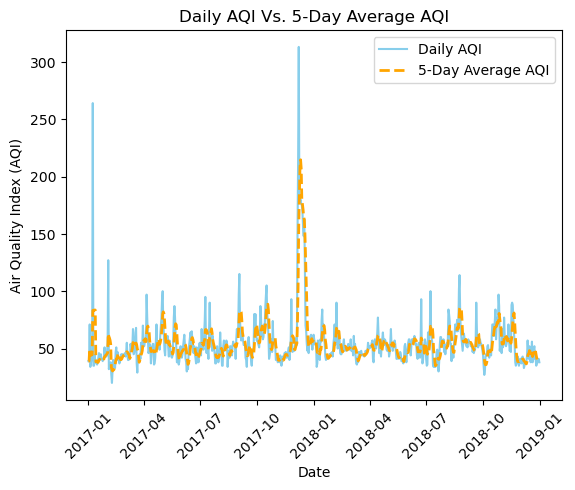

In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read in data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip',compression='zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip',compression='zip')

# Data cleaning

# Concatenate DataFrames aqi_17 and aqi_18 along the default axis
aqi = pd.concat([aqi_17, aqi_18])

# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

# Data Wrangling

# Filter to include only the rows where the county name is 'Santa Barbara'
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']

# Drop unnecessary columns('state_name', 'county_name', 'state_code', and 'county_code')
aqi_sb = aqi_sb.drop(['state_name', 'county_name', 'state_code', 'county_code'], axis=1)

# Convert 'date' column in the aqi_sb DataFrame to datetime format
aqi_sb.date = pd.to_datetime(aqi_sb['date'])

# Set the 'date' column as the index
aqi_sb = aqi_sb.set_index('date')

# Calculate AQI rolling average over 5 days
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling('5D').mean()

# Data plotting

# Plot the daily AQI
plt.plot(aqi_sb.index, aqi_sb['aqi'], label='Daily AQI', color='skyblue', linestyle='-')

# Plot the 5-day average AQI
plt.plot(aqi_sb.index, aqi_sb['five_day_average'], label='5-Day Average AQI', color='orange', linestyle='--', linewidth=2)


# Add titles, labels and legend
plt.title('Daily AQI Vs. 5-Day Average AQI')
plt.xlabel('Date')
plt.ylabel('Air Quality Index (AQI)')
plt.legend()

# Rotate x-labels at a 45 angle in order to fit in graph
plt.xticks(rotation=45)

## 1

a. Read the [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/) from the AirNow.gov portal.

b. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

c. Under "Donwload Data", click on "Pre-generated Data Files".

d. Read the "About the data" section.

## 2
a. Back in the "Pre-generated Data Files" site, click on "Tables of Daily AQI".

b. Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`

Notice we'll be reding the data directly from its ZIP file link. This ZIP file contains a single CSV that has been compressed to save space. 

<!-- BEGIN QUESTION -->

c. In the next code cell read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. 

d. In the same cell, read in the data for the 2018 Daily AQI by County ZIP file and store it as `aqi_18`.

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Read in data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip',compression='zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip',compression='zip')

<!-- END QUESTION -->

## 3
a. and b. Use the next two code cells to look at the head of both data frames. Store your results in `aqi_17_head` and `aqi_18_head`. 

In [10]:
# a. 
# Assign to aqi_17_head the results of .head() to view whole dataset aqi_17
aqi_17_head = aqi_17.head()

# View results
aqi_17_head

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1


In [11]:
# b.
# Assign to aqi_18_head the results of .head() to view whole dataset aqi_18
aqi_18_head = aqi_18.head()

# View results
aqi_18_head

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,42,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,45,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,20,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,25,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,33,Good,PM2.5,01-003-0010,1


<!-- BEGIN QUESTION -->

c. Use this code cell to make some other preliminary data exploration of your choosing.

In [12]:
# Preliminary data exploration for aqi_17
#First Step:
#Use .head() to get more information on the first 10 rows of the dataframe

pd.set_option("display.max_columns",None)
print(aqi_17.head(n=10))

# Second Step:
# Check the number of rows, columns and NaN

print("Number of rows for aqi_17: ", aqi_17.shape[0])

print("Number of columns for aqi_17: ",aqi_17.shape[1])

# Display the number of NaN
print("Number of NaNs in aqi_17 columns: ", aqi_17.isnull().sum())

# Third Step:
# Check data type of each column
print("Data Types: ", aqi_17.dtypes)

# Fourth Step:
# Display statistical summary
aqi_17.describe()

  State Name county Name  State Code  County Code        Date  AQI Category  \
0    Alabama     Baldwin           1            3  2017-01-01   28     Good   
1    Alabama     Baldwin           1            3  2017-01-04   29     Good   
2    Alabama     Baldwin           1            3  2017-01-10   25     Good   
3    Alabama     Baldwin           1            3  2017-01-13   40     Good   
4    Alabama     Baldwin           1            3  2017-01-16   22     Good   
5    Alabama     Baldwin           1            3  2017-01-19   26     Good   
6    Alabama     Baldwin           1            3  2017-01-22   39     Good   
7    Alabama     Baldwin           1            3  2017-01-25   23     Good   
8    Alabama     Baldwin           1            3  2017-01-28   32     Good   
9    Alabama     Baldwin           1            3  2017-01-31   19     Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1 

,State Code,County Code,AQI,Number of Sites Reporting
count,326801.000000,326801.000000,326801.000000,326801.000000
mean,30.116484,79.492147,43.342609,2.024602
std,16.136776,89.537959,23.339487,2.460567
min,1.000000,1.000000,0.000000,1.000000
25%,17.000000,23.000000,32.000000,1.000000
50%,30.000000,59.000000,42.000000,1.000000
75%,42.000000,105.000000,52.000000,2.000000
max,80.000000,840.000000,3767.000000,36.000000


In [13]:
# Preliminary data exploration for aqi_17

#First Step:
#Use .head() to get more information on the first 10 rows of the dataframe
pd.set_option("display.max_columns",None)
print(aqi_18.head(n=10))

# Second Step:
# Check the number of rows, columns and NaN

print("Number of rows for aqi_18: ", aqi_18.shape[0])
print("Number of columns for aqi_18: ",aqi_18.shape[1])

# Display the number of NaN
print("Number of NaNs in aqi_18 columns:: ", aqi_18.isnull().sum())

# Third Step:
# Check data type of each column
print("Data Types: ", aqi_18.dtypes)

# Fourth Step:
# Display statistical summary
aqi_18.describe()

  State Name county Name  State Code  County Code        Date  AQI  Category  \
0    Alabama     Baldwin           1            3  2018-01-02   42      Good   
1    Alabama     Baldwin           1            3  2018-01-05   45      Good   
2    Alabama     Baldwin           1            3  2018-01-08   20      Good   
3    Alabama     Baldwin           1            3  2018-01-11   25      Good   
4    Alabama     Baldwin           1            3  2018-01-14   33      Good   
5    Alabama     Baldwin           1            3  2018-01-17   31      Good   
6    Alabama     Baldwin           1            3  2018-01-20   55  Moderate   
7    Alabama     Baldwin           1            3  2018-01-23   18      Good   
8    Alabama     Baldwin           1            3  2018-01-26   53  Moderate   
9    Alabama     Baldwin           1            3  2018-01-29   20      Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                     

,State Code,County Code,AQI,Number of Sites Reporting
count,327541.000000,327541.000000,327541.000000,327541.000000
mean,30.045558,79.304511,43.126421,2.018825
std,16.175659,88.403819,20.760634,2.462494
min,1.000000,1.000000,0.000000,1.000000
25%,17.000000,23.000000,31.000000,1.000000
50%,30.000000,59.000000,41.000000,1.000000
75%,42.000000,105.000000,52.000000,2.000000
max,80.000000,840.000000,1051.000000,36.000000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

d. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

The first step in our data exploration was to visualize the dataset by setting the option pd.set_option("display.max_columns", None) to ensure all columns are displayed. Then I printed the first 10 rows using .head() to get a snapshot of the data.

Next, we assessed the size of the dataset by calculating the number of rows and columns. This provides a sense of the dataset's scale. Calculating the NaN, is important for understanding the extent of missing data which can guide further cleaning steps.

In the third step, we examined the data types of each column to ensure they are appropriate for the data they contain. If any columns had incorrect data types, adjustments would need to be made accordingly.

The last step was to generate summary statistics for numerical columns, which provides insights into the distribution, mean, and standard deviation.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 4
We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.


In [14]:
# Concatenate DataFrames aqi_17 and aqi_18 along the default axis
aqi = pd.concat([aqi_17, aqi_18])

# View results
print(aqi)

       State Name county Name  State Code  County Code        Date  AQI  \
0         Alabama     Baldwin           1            3  2017-01-01   28   
1         Alabama     Baldwin           1            3  2017-01-04   29   
2         Alabama     Baldwin           1            3  2017-01-10   25   
3         Alabama     Baldwin           1            3  2017-01-13   40   
4         Alabama     Baldwin           1            3  2017-01-16   22   
...           ...         ...         ...          ...         ...  ...   
327536    Wyoming      Weston          56           45  2018-12-27   36   
327537    Wyoming      Weston          56           45  2018-12-28   35   
327538    Wyoming      Weston          56           45  2018-12-29   35   
327539    Wyoming      Weston          56           45  2018-12-30   31   
327540    Wyoming      Weston          56           45  2018-12-31   35   

       Category Defining Parameter Defining Site  Number of Sites Reporting  
0          Good      

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 5

Run the following code cell and use the next markdown cell to give a line by line explanation of the code below the comment "#Simplify column names". You might need to look up the `pandas` documentation.

In [15]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



1. `print(aqi.columns, '\n')`: This line prints the column names of `aqi`, the `\n` creates a new line for better readability

2. a) `aqi.columns = (aqi.columns.str.lower()`:  assigning new values to the column names

b)`.str`: This function converts all column names to lowercase. The str allows to apply it  to each element in the index

c)`.replace(' ','_'))` : This function replaces spaces with underscores '_'


3. `print(aqi.columns, '\n')`: double checking the work - prints out the updated column names in `aqi`

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 6
In the next code cell:

a. Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

b. Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`.

Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [16]:
# Filter to include only the rows where the county name is 'Santa Barbara'
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']

# Drop unnecessary columns('state_name', 'county_name', 'state_code', and 'county_code')
aqi_sb = aqi_sb.drop(['state_name', 'county_name', 'state_code', 'county_code'], axis=1)

# View results
print(aqi_sb)

             date  aqi  category defining_parameter defining_site  \
28648  2017-01-01   39      Good              Ozone   06-083-4003   
28649  2017-01-02   39      Good              PM2.5   06-083-2011   
28650  2017-01-03   71  Moderate               PM10   06-083-4003   
28651  2017-01-04   34      Good              Ozone   06-083-4003   
28652  2017-01-05   37      Good              Ozone   06-083-4003   
...           ...  ...       ...                ...           ...   
29128  2018-12-27   37      Good              Ozone   06-083-1025   
29129  2018-12-28   39      Good              Ozone   06-083-1021   
29130  2018-12-29   39      Good              Ozone   06-083-1021   
29131  2018-12-30   41      Good              PM2.5   06-083-1008   
29132  2018-12-31   38      Good              Ozone   06-083-2004   

       number_of_sites_reporting  
28648                         12  
28649                         11  
28650                         12  
28651                         1

<!-- END QUESTION -->

 
c. What is the data type of the `date` column? Store your answer in the `date_type` variable. Your answer should contain the type for the **date column only**. 

In [17]:
# Assign to date_type the data type of the 'date' column
date_type = aqi_sb['date'].dtype

# View results
date_type

dtype('O')

<!-- BEGIN QUESTION -->

## 7
In the following cell:
1. Update the date column of `aqi_sb` to be a `pandas.datetime` object.
2. Update the index of `aqi_sb` to be the `date` column.

In [18]:
# Convert 'date' column in the aqi_sb DataFrame to datetime format
aqi_sb.date = pd.to_datetime(aqi_sb['date'])

# Set the 'date' column as the index
aqi_sb = aqi_sb.set_index('date')

# View results
print(aqi_sb)

            aqi  category defining_parameter defining_site  \
date                                                         
2017-01-01   39      Good              Ozone   06-083-4003   
2017-01-02   39      Good              PM2.5   06-083-2011   
2017-01-03   71  Moderate               PM10   06-083-4003   
2017-01-04   34      Good              Ozone   06-083-4003   
2017-01-05   37      Good              Ozone   06-083-4003   
...         ...       ...                ...           ...   
2018-12-27   37      Good              Ozone   06-083-1025   
2018-12-28   39      Good              Ozone   06-083-1021   
2018-12-29   39      Good              Ozone   06-083-1021   
2018-12-30   41      Good              PM2.5   06-083-1008   
2018-12-31   38      Good              Ozone   06-083-2004   

            number_of_sites_reporting  
date                                   
2017-01-01                         12  
2017-01-02                         11  
2017-01-03                       

<!-- END QUESTION -->

## 8
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

Store your answer in the `rolling_average` variable. You should have two columns in your series, `date` and the averages. 

In [19]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling('5D').mean()

# View results
print(rolling_average)

date
2017-01-01    39.000000
2017-01-02    39.000000
2017-01-03    49.666667
2017-01-04    45.750000
2017-01-05    44.000000
                ...    
2018-12-27    41.200000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    38.200000
2018-12-31    38.800000
Name: aqi, Length: 730, dtype: float64


## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named `five_day_average` to the `aqi_sb` dataframe. 

In [20]:
# Assign the caculated AQI rolling average over 5 days to a new column named 'five_day_average'
aqi_sb['five_day_average']=rolling_average

# View results
print(aqi_sb)

            aqi  category defining_parameter defining_site  \
date                                                         
2017-01-01   39      Good              Ozone   06-083-4003   
2017-01-02   39      Good              PM2.5   06-083-2011   
2017-01-03   71  Moderate               PM10   06-083-4003   
2017-01-04   34      Good              Ozone   06-083-4003   
2017-01-05   37      Good              Ozone   06-083-4003   
...         ...       ...                ...           ...   
2018-12-27   37      Good              Ozone   06-083-1025   
2018-12-28   39      Good              Ozone   06-083-1021   
2018-12-29   39      Good              Ozone   06-083-1021   
2018-12-30   41      Good              PM2.5   06-083-1008   
2018-12-31   38      Good              Ozone   06-083-2004   

            number_of_sites_reporting  five_day_average  
date                                                     
2017-01-01                         12         39.000000  
2017-01-02         

<!-- BEGIN QUESTION -->

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Make necessary updates for the plot to be accurate, informative, and polished, even if simple. You're welcome to use plotting methods and packages beyond what we have covered in class! 

Can you see the AQI going up during the Thomas Fire in December 2017?

(array([17167., 17257., 17348., 17440., 17532., 17622., 17713., 17805.,
        17897.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

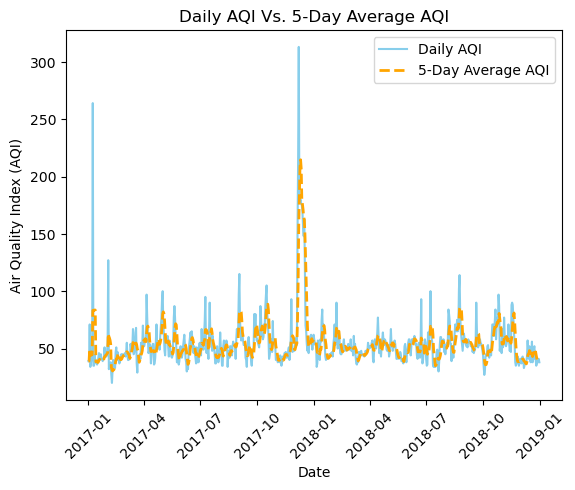

In [21]:
# Plot the daily AQI
plt.plot(aqi_sb.index, aqi_sb['aqi'], label='Daily AQI', color='skyblue', linestyle='-')

# Plot the 5-day average AQI
plt.plot(aqi_sb.index, aqi_sb['five_day_average'], label='5-Day Average AQI', color='orange', linestyle='--', linewidth=2)

# Add titles, labels and legend
plt.title('Daily AQI Vs. 5-Day Average AQI')
plt.xlabel('Date')
plt.ylabel('Air Quality Index (AQI)')
plt.legend()

# Rotate x-labels at a 45 angle in order to fit in graph
plt.xticks(rotation=45)

#Can you see the AQI going up during the Thomas Fire in December 2017?

The 'Daily AQI Vs. 5-Day Average AQI' plot demonstrates the air quality from 2017-2018. It is clear that the Thomas Fire event had a major impact on the AQI, we can observe a major spike on the graph, indicating deteriorated air quality due to increased particulate matter in the air.

## 10

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).